<h1 style='color:#ff6666; font-family: "Courier New", Monospace; text-align:center'>
Titanic - Kaggle Competition</h1>
<h3 style='color:#ff6666; font-family: "Courier New", Monospace; text-align:right'>
By:- Kashish Nagpal</h3>

<h2>Exploratory Data Analysis</h2>
<p>This will be done in 4 parts<p>
<ul>
<l1>1.  Data Extraction - Loading the dataset</l1>
<l1>2.  Data Cleaning/Wrangling - Finding the missing values</l1>
<l1>3.  Plotting - Creating some plots to visualize the correlations and some hidden insights</l1>
<l1>4.  Asumptions - Formulating hypothesis from charts</l1>
<ul>

<h3 style='color:#ff1a1a'>1. Data Extraction</h3>

In [1]:
#---Importing the Libraries---
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

%matplotlib inline

In [2]:
#---Importing the dataset---
dataset = pd.read_csv('train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3 style='color:#ff1a1a'>2. Data Cleaning/Wrangling</h3>

In [3]:
#---Number of rows and columns---
dataset.shape

(891, 12)

In [4]:
#---Basic Statistics---
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h5 style='color:#004d99'>Looking at the count, we find that age has some missing values. So, we need to fill it using median Age of the entire 'Age' column</h5>

In [5]:
#---Filling the missing values---
dataset['Age'].fillna(value = dataset['Age'].median(), inplace = True)

#---Rechecking the stats---
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3 style='color:#ff1a1a'>3. Plotting</h3>

<h5 style='color:#004d99'>Let us visualize the dataset based on <u>Gender</u></h5>

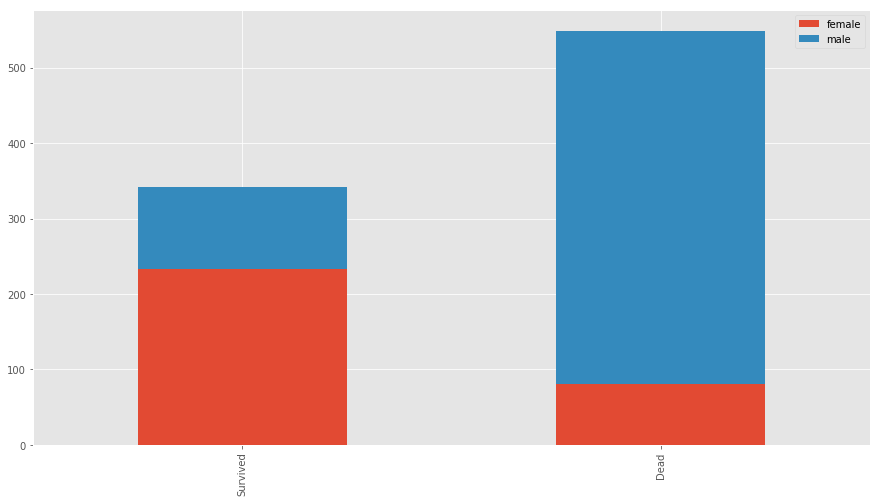

In [6]:
#---Creating a bar chart for survival based on gender---
survived_sex = dataset[dataset['Survived'] == 1]['Sex'].value_counts()
dead_sex = dataset[dataset['Survived'] == 0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

<h5 style='color:#004d99'>Looking at the plot, <u>Women are more likely to survive more</u>. Hence gender seems to be a decisive feature in our classification</h5>
<h5 style='color:#004d99'>Now, visulaizing the dataset based on <u>Age</u></h5>

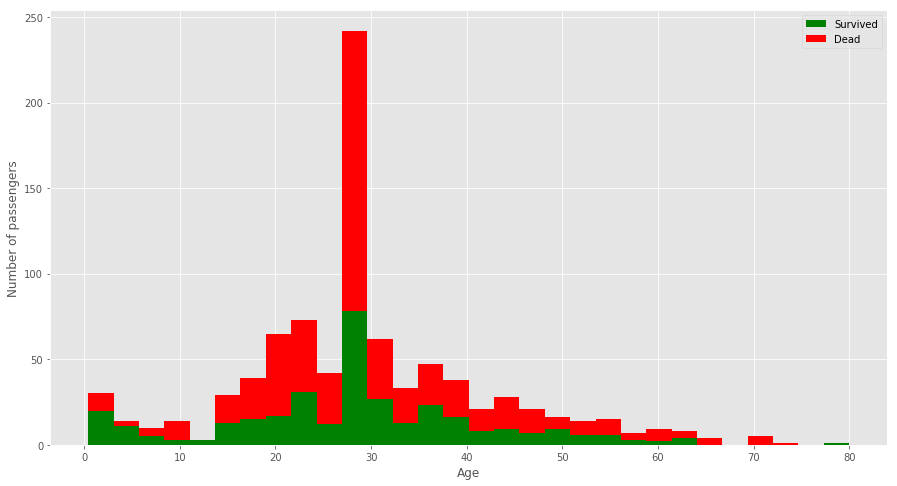

In [7]:
#---Creating a bar chart for survival based on Age---
figure = plt.figure(figsize=(15,8))
plt.hist([dataset[dataset['Survived']==1]['Age'], dataset[dataset['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

<h5 style='color:#004d99'>From this, we can say that people with age <u>less than 10(children)</u> are likely to survive more.</h5>
<h5 style='color:#004d99'>Well, this is quite intuitive as Women and Children are rescued first</h5>
<h5 style='color:#004d99'>Now, plotting Fare ticket of each passenger vs the Survival</h5>

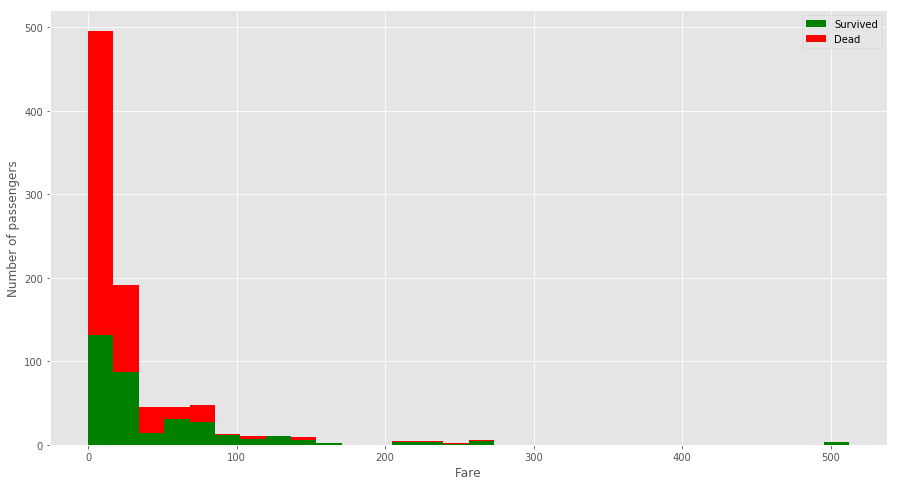

In [8]:
#---Creating a Histogram for survival based on Fare---
figure = plt.figure(figsize=(15,8))
plt.hist([dataset[dataset['Survived']==1]['Fare'],dataset[dataset['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

<h5 style='color:#004d99'>We can see that passengers with <u>expensive tickets are more likely to survive</u>. Maybe because of social Status!!!</h5>

<h5 style='color:#004d99'>Let's now combine the age, the fare and the survival on a single chart.</h5>

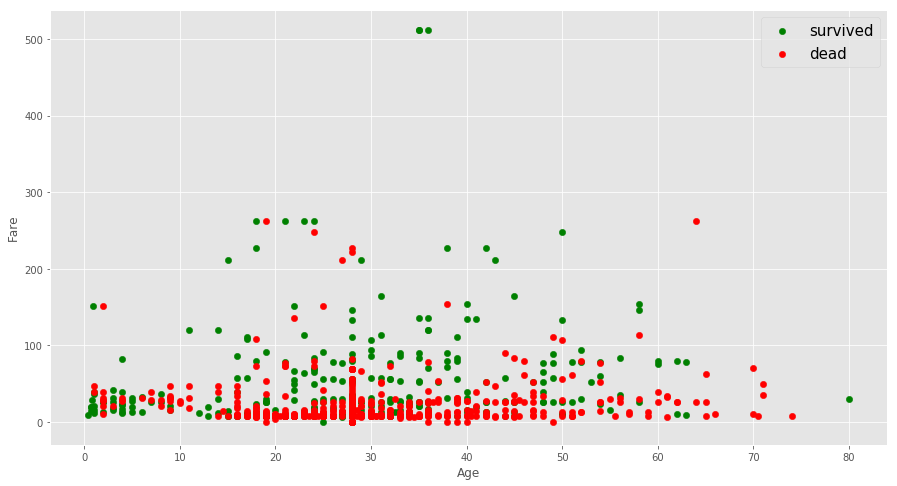

In [9]:
#---Scatter Plot---
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(dataset[dataset['Survived']==1]['Age'],dataset[dataset['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(dataset[dataset['Survived']==0]['Age'],dataset[dataset['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

<h5 style='color:#004d99'>A distinct cluster of dead passengers (the red one) appears on the chart. Those people are adults (age between 15 and 50) of lower class (lowest ticket fares).</h5>

<h3 style='color:#ff1a1a'>4. Assumptions</h3>
<h5 style='color:#004d99'>Survival of the passengers seems to be correlated with the following features
<ul><li>Gender</li><li>Age</li><li>Fare</li>
</ul>
</h5>

---

<h2>Feature Engineering</h2>
<h5 style='color:#004d99'>Improving the features for further in-depth analysis</h5>

In [53]:
#---Function for combining the training and testing dataset---
def get_combined_data():
    # Loading the train and test data
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    
    # Extracting and removing targets from training data
    global targets
    targets = train.Survived
    train.drop('Survived', axis=1, inplace=True)
    
    # Merging train and test set
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index', inplace=True, axis=1)
    
    return combined

In [54]:
combined = get_combined_data()
combined.shape

(1309, 11)

<h5 style='color:#004d99'>With this, train and test sets have been combined</h5>

In [55]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h5 style='color:#004d99'>Now, we'll create a function for extracting <u>titles of the names</u> and can be stored as a new feature namely 'Social Status'</h5>

In [56]:
def get_titles():

    global combined
    
    # We extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # A map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # We map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)

# Calling the function get_titles()
get_titles()
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [57]:
# Now dropping the 'Name' column
combined.drop('Name', axis=1, inplace=True)
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [58]:
#---Checking for the missing values---
combined.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

<h5 style='color:#004d99'>Now, we'll fill the missing values of <u>Age, Fare and Embarked</u></h5>

In [59]:
#---For Age, We'll take the median of the column
combined['Age'].fillna(combined['Age'].median(), inplace=True)

#---For Fare, We'll take the mean
combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)

In [60]:
#---Now for Embarked, we'll find the value with maximum counts in the column
combined['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

<h5 style='color:#004d99'>Since, S has the maximum frequency, we'll replace the missing Embarked values with 'S'</h5>

In [61]:
#---Filling the missing Embarked values with S---
combined['Embarked'].fillna('S', inplace=True)

#---Looking at the describe function---
combined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.503186,0.498854,0.385027,33.295479
std,378.020061,0.837836,12.905241,1.041658,0.865560,51.738879
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<h5 style='color:#004d99'>Creating the dummy variables for Sex, Title and Embarked</h5>

In [62]:
combined = pd.get_dummies(combined, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

In [63]:
#---Looking at the head column---
combined.shape

(1309, 16)

In [64]:
combined.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1,0,0,0
1,2,1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,0
3,4,1,35.0,1,0,113803,53.1000,C123,0,0,1,0,0,1,0,0
4,5,3,35.0,0,0,373450,8.0500,NaN,1,0,1,0,1,0,0,0


<h5 style='color:#004d99'>We'll drop Cabin and Ticket column</h5>

In [65]:
combined.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [66]:
combined.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,22.0,1,0,7.2500,1,0,1,0,1,0,0,0
1,2,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,0
3,4,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0
4,5,3,35.0,0,0,8.0500,1,0,1,0,1,0,0,0


---

<h2>Modelling</h2>

<h5 style='color:#004d99'>We'll Apply the Random Forest Classifier</h5>

In [83]:
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('train.csv')
    
    targets = train0.Survived
    train = combined.head(891)
    test = combined.iloc[891:]
    
    return train, test, targets

In [84]:
train, test, targets = recover_train_test_target()

<h5 style='color:#004d99'>Using Grid Search for feature Selection using cross_validation score</h5>

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [96]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [97]:
compute_score(model, train, targets, scoring='accuracy')

0.81483686533770106

---